<a href="https://colab.research.google.com/github/kaizen-abhinav/PDECODE-APPLICATIONCHALLENGES/blob/main/Experiment6_AC.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Application Challenge: Step Response of an RLC Circuit
Problem: Consider a series RLC circuit which is initially at rest (zero initial conditions). A step voltage of 5 volts is applied at $t=0$
. Determine the step response of the circuit, i.e., the current $i(t)$
 as a function of time, using the inverse Laplace transform method. Use the following component values:
- Resistance (R): 10 Ω
- Inductance (L): 0.1 H
- Capacitance (C): 0.001 F (1 mF)

# Circuit Analysis
For a series RLC circuit, Kirchhoff’s Voltage Law (KVL) gives:
$L \frac{di(t)}{dt} + R i(t) + \frac{1}{C} \int_0^t i(\tau) \, d\tau = v_s(t)$



Taking the Laplace transform of the entire equation (with zero initial conditions):

 $sLI(s) + RI(s) + \frac{1}{sC}I(s) = V(s)$

The input is a step voltage of 5V, so $v_s(t) = 5u(t)$
, and its transform is $V(s) = \frac{5}{s}$

. Substituting for $V(s)$
 and solving for the current $I(s)$
:
$I(s) \left( sL + R + \frac{1}{sC} \right) = \frac{5}{s} \implies I(s) = \frac{\frac{5}{s}}{sL + R + \frac{1}{sC}}$






Simplifying this expression gives us the function we need to find the inverse transform of:

 $I(s) = \frac{5/L}{s^2 + \frac{R}{L}s + \frac{1}{LC}}$


The s-domain expression for the current is I(s) =
         50.0         
──────────────────────
 2                    
s  + 100.0⋅s + 10000.0

The time-domain expression for the current is i(t) =
                   -50.0⋅t                        
0.577350269189626⋅ℯ       ⋅sin(86.6025403784439⋅t)


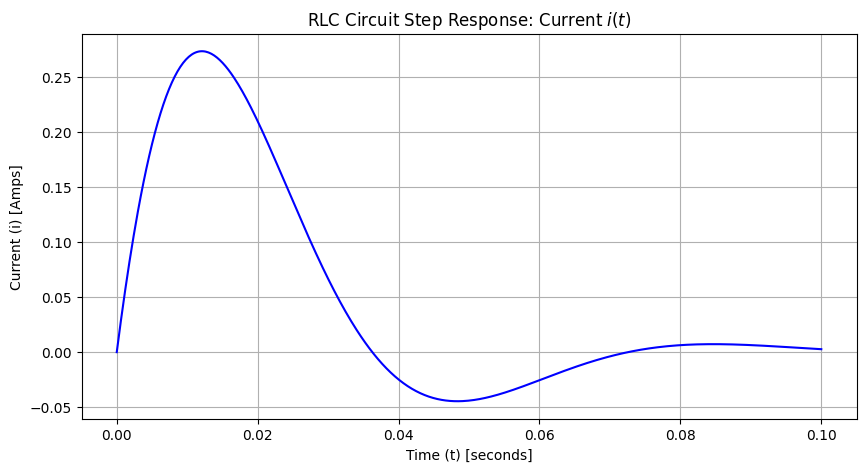

In [1]:
import sympy as sp
import numpy as np
import matplotlib.pyplot as plt

# --- Define symbols and parameters ---
s, t = sp.symbols('s t', real=True, positive=True)
R_val, L_val, C_val, V_val = 10, 0.1, 0.001, 5

# --- Define the s-domain function I(s) ---
# Derived from the circuit analysis above
I_s = (V_val / L_val) / (s**2 + (R_val / L_val) * s + 1 / (L_val * C_val))
print(f"The s-domain expression for the current is I(s) =")
sp.pprint(I_s)

# --- Compute the Inverse Laplace Transform to find i(t) ---
# <<<<<<<<<<<<<<<<<<<< FIX IS HERE: Add noconds=True <<<<<<<<<<<<<<<<<<<<
i_t = sp.inverse_laplace_transform(I_s, s, t, noconds=True)
# ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
print("\nThe time-domain expression for the current is i(t) =")
sp.pprint(i_t)

# --- Lambdify for plotting ---
i_t_func = sp.lambdify(t, i_t, 'numpy')

# --- Generate time values and plot ---
t_values = np.linspace(0, 0.1, 500) # The action happens quickly
i_values = i_t_func(t_values)

plt.figure(figsize=(10, 5))
plt.plot(t_values, i_values, color='blue')
plt.title(r'RLC Circuit Step Response: Current $i(t)$')
plt.xlabel(r'Time (t) [seconds]')
plt.ylabel(r'Current (i) [Amps]')
plt.grid(True)
plt.show()

# Discussion of RLC Circuit Result
The inverse Laplace transform provides the exact analytical solution for the current
 in the circuit.

- Underdamped Response: The plot shows a classic underdamped response. When the voltage is applied, the current surges to a peak, overshoots the final - - -    - steady-state value, and then oscillates with decreasing amplitude until it settles.
Steady-State Behavior: As $t\to \infty$
, the current $i(t)\to 0$
. This is physically correct. In a DC circuit, after the initial transient period, the inductor acts like a short circuit (a wire) and the capacitor acts as an open circuit. Since the capacitor blocks the DC current in the steady state, the final current must be zero.

- Connection to System Poles: The oscillatory behavior is due to the complex conjugate poles of the denominator of $I(s)$
. If the poles were real and distinct, the response would be overdamped (no oscillation). If the poles were real and repeated, it would be critically damped. This problem beautifully demonstrates how the mathematical properties of $F(s)$
 directly dictate the physical nature of
.$f(t)$